In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import os
import ast
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import plotly.express as px
from collections import defaultdict
from copy import deepcopy
from itertools import chain
import random
import time
import itertools
import math
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
count=input('何番目のデータまで読み込み?(最大は10000)')
def search_and_load_csv(folder_path, keyword):

    all_dataframes = []  # ロードされたすべてのDataFramesを保存する
    
    # フォルダとサブフォルダ内のファイルを反復処理する
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # ファイルがCSVファイルで、ファイル名にキーワードが含まれているかチェックする
            if keyword in file and file.endswith('.csv'):
                file_path = os.path.join(root, file)
                try:
                    # CSVファイルをDataFrameに読み込む
                    df = pd.read_csv(file_path)
                    all_dataframes.append(df)
                    print(f"ファイル読み込み成功: {file_path}")
                except Exception as e:
                    print(f"ファイル読み込めない {file_path}: {e}")

    if all_dataframes:
        combined_df = pd.concat(all_dataframes, ignore_index=True)
        return combined_df
    else:
        print("該当するCSVファイルが見つかりません")
        return pd.DataFrame()
    
for i in np.arange(1,int(count)+1):# 使用例
    folder = "D:\\pysrc\\wang_data\\jobset\\double normal\\j1[5,1],j2[8,1]\\p1[5,1],p2[8,1]\\machine[4]\\t1[10,1],t2[15,1]\\seed[3]" 
    keyword = ","+str(i)+"gene"  # キーワードを変わる
    globals()[f"df{i}"] = search_and_load_csv(folder, keyword)

# 打印结果
#if not df_i.empty:
    #print("合并后的DataFrame:")
    #print(df_i.head())
#else:
    #print("未加载任何数据。")

ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[7]r[6]c,1gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[6]r[5]c,2gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[5]r[5]c,3gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[5]r[6]c,4gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[7]r[4]c,5gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[4]r[5]c,6gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[4]r[7]c,7gene.csv
ファイル読み込み成功: D:\pysrc

In [3]:
dfs = {}
T_genes = {}
MS_genes = {}

for i in np.arange(1,int(count)+1):
    df= globals()[f"df{i}"]
    T_gene = pd.DataFrame(index=df.index, columns=df.columns)
    MS_gene = pd.DataFrame(index=df.index, columns=df.columns)
    
    for col in df.columns:
        for idx in df.index:
            value = df.loc[idx, col]
            if value.startswith('(') and value.endswith(')'):  # 判断元素是否为元组字符串
                 # 使用 ast.literal_eval 安全地将字符串转换为元组
                value_tuple = ast.literal_eval(value)
                T_gene.loc[idx, col] = float(value_tuple[1]) 
                MS_gene.loc[idx, col] = float(value_tuple[0]) 
            else:
                try:
                    # 如果是单一数字（字符串形式），尝试转换为浮动数值
                    T_gene.loc[idx, col] = float(value)
                    MS_gene.loc[idx, col] = float(value)
                except ValueError:
                    # 如果不能转换为数字，则保留原值
                    T_gene.loc[idx, col] = value
                    MS_gene.loc[idx, col] = value
    
    T_gene = T_gene.to_numpy()  
    globals()[f"T_gene{i}"] = T_gene[:,1:].astype(int)
    MS_gene = MS_gene.to_numpy() 
    globals()[f"MS_gene{i}"] = MS_gene[:,1:].astype(int)

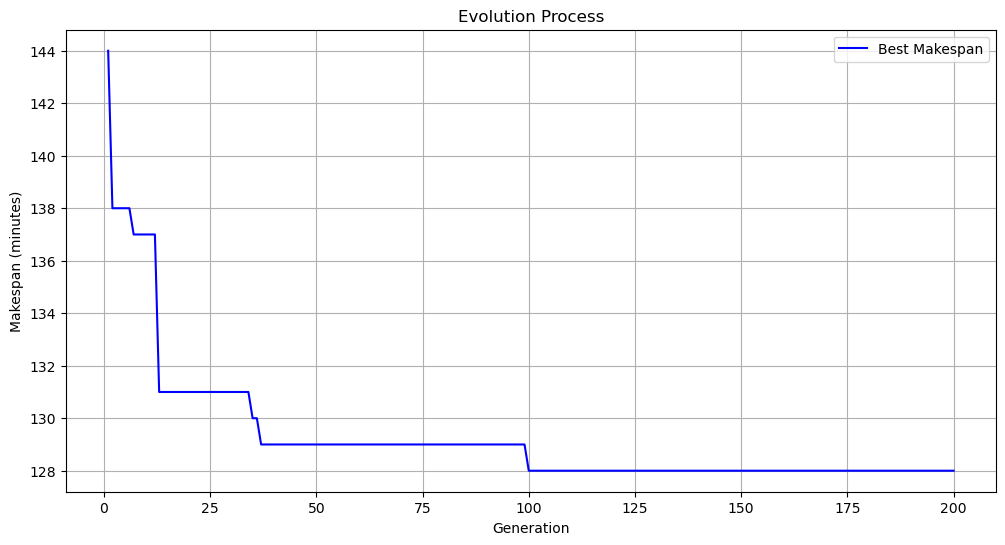

第 88 回的结果

最优完成时间: 128 分钟
染色体验证结果: True


C:\Users\G15\AppData\Local\Temp\ipykernel_29484\1987689465.py:270: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(jobs))


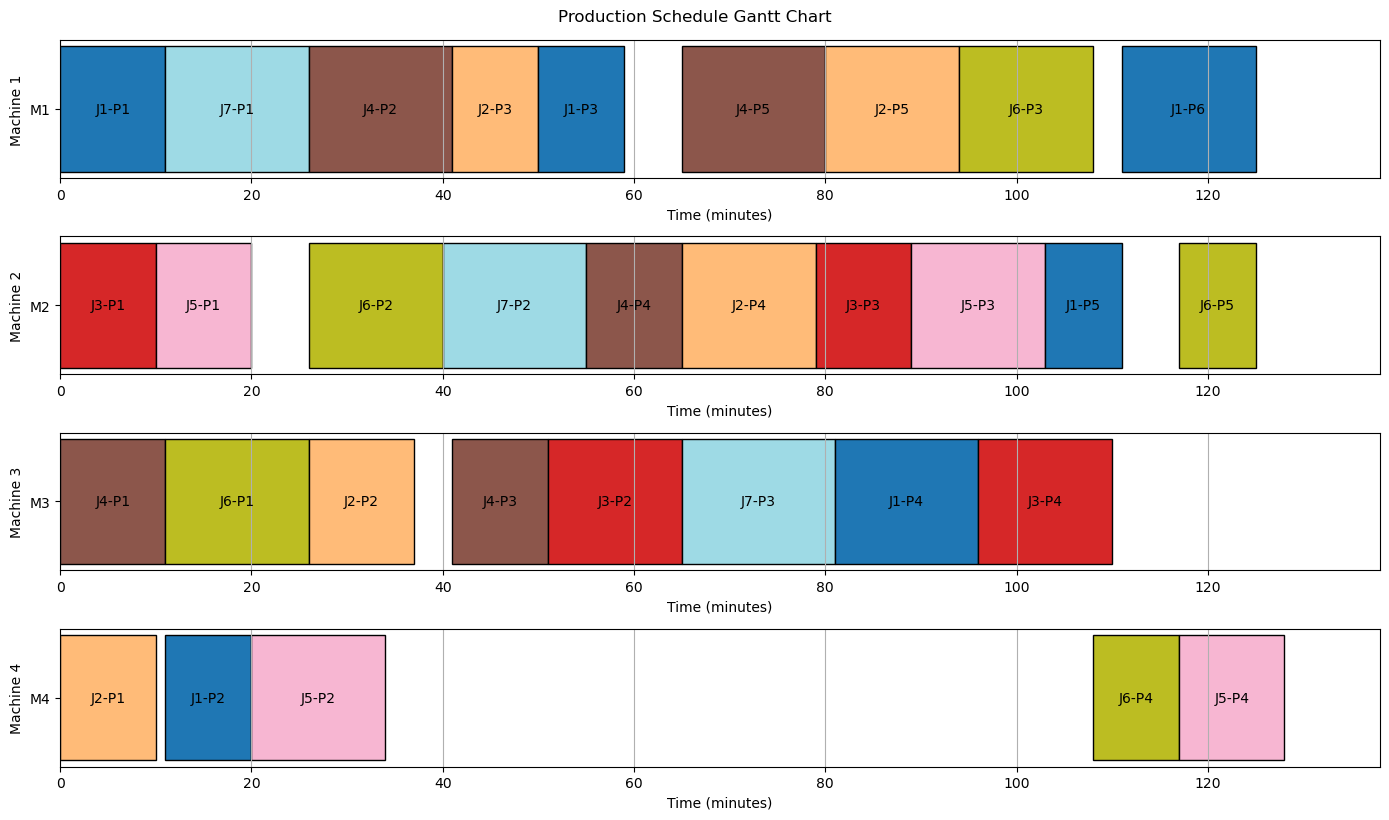

In [4]:
ID=input('何回目のジョブデータを見たい?')
time_matrix = globals()[f"T_gene{ID}"]
machine_matrix = globals()[f"MS_gene{ID}"]
time_matrix[time_matrix == 0] = -1
machine_matrix[machine_matrix == 0] = -1

# 预处理生成工序列表
jobs = []
for job_id in range(len(time_matrix)):
    steps = []
    for step in range(len(time_matrix[job_id])):
        if time_matrix[job_id][step] == -1:
            break
        steps.append({
            'machine': machine_matrix[job_id][step] - 1,  # 转为0-based
            'duration': time_matrix[job_id][step]
        })
    jobs.append(steps)

# 遗传算法参数
POP_SIZE = 100
MAX_GEN = 200
CX_PROB = 0.8
MUT_PROB = 0.1
ELITE_SIZE = 2
TOURNAMENT_SIZE = 5

class Chromosome:
    def __init__(self, genes):
        self.genes = genes  # 格式: [(job_id, step_id), ...]
        self._makespan = None
    
    def validate(self):
        """验证工序顺序正确性"""
        job_progress = defaultdict(int)
        for gene in self.genes:
            job_id, step_id = gene
            if step_id != job_progress[job_id]:
                return False
            job_progress[job_id] += 1
        # 检查是否包含所有必需基因
        required = {(j, s) for j in range(len(jobs)) for s in range(len(jobs[j]))}
        return set(self.genes) == required
    
    def repair(self):
        """染色体修复机制"""
        # 补全缺失基因并去除重复
        present_genes = set(self.genes)
        required_genes = {(j, s) for j in range(len(jobs)) for s in range(len(jobs[j]))}
        missing = list(required_genes - present_genes)
        duplicates = list(present_genes - required_genes)
        
        # 替换重复基因
        new_genes = self.genes.copy()
        while duplicates and missing:
            dup_idx = next(i for i,g in enumerate(new_genes) if g in duplicates)
            new_genes[dup_idx] = missing.pop()
            duplicates.remove(new_genes[dup_idx])
        
        # 按作业顺序重新排序
        sorted_genes = []
        job_progress = defaultdict(int)
        remaining = new_genes.copy()
        while remaining:
            available = [g for g in remaining if g[1] == job_progress[g[0]]]
            if not available:  # 处理意外情况
                available = remaining
            selected = random.choice(available)
            sorted_genes.append(selected)
            job_progress[selected[0]] += 1
            remaining.remove(selected)
        
        self.genes = sorted_genes
        return self
    
    def makespan(self):
        """计算总完成时间（带缓存）"""
        if self._makespan is None:
            self._makespan = self._calculate_makespan()
        return self._makespan
    
    def _calculate_makespan(self):
        machine_times = defaultdict(int)
        job_times = defaultdict(int)
        
        for gene in self.genes:
            job_id, step_id = gene
            machine = jobs[job_id][step_id]['machine']
            duration = jobs[job_id][step_id]['duration']
            
            start = max(job_times[job_id], machine_times[machine])
            end = start + duration
            
            job_times[job_id] = end
            machine_times[machine] = end
        
        return max(job_times.values(), default=0)

def initialize_population():
    """初始化合法种群"""
    population = []
    for _ in range(POP_SIZE):
        genes = []
        job_progress = defaultdict(int)
        remaining = sum(len(job) for job in jobs)
        
        while remaining > 0:
            available_jobs = [j for j in range(len(jobs)) 
                            if job_progress[j] < len(jobs[j])]
            selected_job = random.choice(available_jobs)
            step = job_progress[selected_job]
            genes.append((selected_job, step))
            job_progress[selected_job] += 1
            remaining -= 1
            
        population.append(Chromosome(genes))
    return population

def strict_precedence_crossover(parent1, parent2):
    """严格顺序保留交叉"""
    # 创建工序池
    pool = defaultdict(list)
    for gene in parent1.genes + parent2.genes:
        pool[gene[0]].append(gene)
    
    # 合并工序链
    child_genes = []
    job_progress = defaultdict(int)
    
    while len(child_genes) < sum(len(job) for job in jobs):
        available_jobs = [j for j in range(len(jobs)) 
                        if job_progress[j] < len(jobs[j])]
        selected_job = random.choice(available_jobs)
        
        # 从两个父代中选择下一步工序
        candidates = [g for g in pool[selected_job] 
                     if g[1] == job_progress[selected_job]]
        if candidates:
            selected_gene = random.choice(candidates)
            child_genes.append(selected_gene)
            pool[selected_job].remove(selected_gene)
            job_progress[selected_job] += 1
    
    return Chromosome(child_genes).repair()

def enhanced_safe_mutation(chromosome):
    """增强安全变异"""
    genes = chromosome.genes.copy()
    
    # 寻找可交换位置（不同作业的非连续工序）
    swap_candidates = []
    for i in range(len(genes)):
        current_job, current_step = genes[i]
        # 检查是否是该作业的最后一步
        if current_step == len(jobs[current_job]) - 1:
            continue
        # 检查是否被相同作业的工序包围
        prev_same = (i > 0 and genes[i-1][0] == current_job)
        next_same = (i < len(genes)-1 and genes[i+1][0] == current_job)
        if not prev_same and not next_same:
            swap_candidates.append(i)
    
    if len(swap_candidates) >= 2:
        idx1, idx2 = random.sample(swap_candidates, 2)
        if genes[idx1][0] != genes[idx2][0]:
            genes[idx1], genes[idx2] = genes[idx2], genes[idx1]
    
    return Chromosome(genes).repair()

def tournament_selection(population):
    """锦标赛选择"""
    selected = []
    for _ in range(2):
        contestants = random.sample(population, TOURNAMENT_SIZE)
        contestants.sort(key=lambda x: x.makespan())
        selected.append(deepcopy(contestants[0]))
    return selected

def genetic_algorithm():
    population = initialize_population()
    best_chrom = min(population, key=lambda x: x.makespan())
    history = []
    
    for gen in range(MAX_GEN):
        # 种群修复
        population = [chrom.repair() for chrom in population]
        
        # 评估适应度
        fitnesses = []
        for chrom in population:
            if not chrom.validate():
                chrom._makespan = float('inf')
            fitnesses.append(chrom.makespan())
        
        # 记录历史数据
        current_best = min(fitnesses)
        history.append({
            'gen': gen+1,
            'best': current_best,
            'avg': np.mean(fitnesses),
            'worst': max(fitnesses)
        })
        
        # 更新全局最优
        if current_best < best_chrom.makespan():
            best_chrom = deepcopy(population[fitnesses.index(current_best)])
        
        # 精英选择
        elite = sorted(population, key=lambda x: x.makespan())[:ELITE_SIZE]
        
        # 生成新一代
        new_population = elite.copy()
        while len(new_population) < POP_SIZE:
            # 选择父代
            parent1, parent2 = tournament_selection(population)
            
            # 交叉
            if random.random() < CX_PROB:
                child = strict_precedence_crossover(parent1, parent2)
            else:
                child = random.choice([parent1, parent2])
            
            # 变异
            child = enhanced_safe_mutation(child)
            
            new_population.append(child)
        
        population = new_population[:POP_SIZE]
        
        #print(f"Generation {gen+1}: Best={current_best}")
    
    # 绘制进化曲线
    plt.figure(figsize=(12,6))
    gens = [h['gen'] for h in history]
    plt.plot(gens, [h['best'] for h in history], 'b-', label='Best Makespan')
    #plt.plot(gens, [h['avg'] for h in history], 'r--', label='Average Makespan')
    plt.xlabel('Generation')
    plt.ylabel('Makespan (minutes)')
    plt.title('Evolution Process')
    plt.legend()
    plt.grid()
    plt.show()
    
    return best_chrom

def plot_gantt(chromosome):
    """绘制甘特图"""
    schedule = defaultdict(list)
    machine_times = defaultdict(int)
    job_times = defaultdict(int)
    
    for gene in chromosome.genes:
        job_id, step_id = gene
        machine = jobs[job_id][step_id]['machine']
        duration = jobs[job_id][step_id]['duration']
        start = max(job_times[job_id], machine_times[machine])
        end = start + duration
        
        schedule[machine].append({
            'job': job_id+1,
            'step': step_id+1,
            'start': start,
            'end': end
        })
        
        job_times[job_id] = end
        machine_times[machine] = end
    
    plt.figure(figsize=(14, 8))
    colors = plt.cm.get_cmap('tab20', len(jobs))
    
    for idx, machine in enumerate(sorted(schedule.keys())):
        plt.subplot(len(schedule), 1, idx+1)
        tasks = sorted(schedule[machine], key=lambda x: x['start'])
        
        for task in tasks:
            plt.barh(
                y=f'M{machine+1}',
                width=task['end']-task['start'],
                left=task['start'],
                color=colors(task['job']-1),
                edgecolor='black'
            )
            plt.text(
                x=(task['start'] + task['end'])/2,
                y=f'M{machine+1}',
                s=f'J{task["job"]}-P{task["step"]}',
                va='center',
                ha='center'
            )
        
        plt.xlabel('Time (minutes)')
        plt.ylabel(f'Machine {machine+1}')
        plt.xlim(0, chromosome.makespan() + 10)
        plt.grid(axis='x')
    
    plt.tight_layout()
    plt.suptitle('Production Schedule Gantt Chart', y=1.02)
    plt.show()

# 运行算法
best_solution = genetic_algorithm()

# 输出结果
print('第',ID,'回的结果')
print(f"\n最优完成时间: {best_solution.makespan()} 分钟")
print("染色体验证结果:", best_solution.validate())
plot_gantt(best_solution)

In [5]:
print(time_matrix)
print(machine_matrix)

[[11  9  9 15  8 14]
 [10 11  9 14 14 -1]
 [10 14 10 14 -1 -1]
 [11 15 10 10 15 -1]
 [10 14 14 11 -1 -1]
 [15 14 14  9  8 -1]
 [15 15 16 -1 -1 -1]]
[[ 1  4  1  3  2  1]
 [ 4  3  1  2  1 -1]
 [ 2  3  2  3 -1 -1]
 [ 3  1  3  2  1 -1]
 [ 2  4  2  4 -1 -1]
 [ 3  2  1  4  2 -1]
 [ 1  2  3 -1 -1 -1]]


Gen 1: Best=0
Gen 2: Best=0
Gen 3: Best=0
Gen 4: Best=0
Gen 5: Best=0
Gen 6: Best=0
Gen 7: Best=0
Gen 8: Best=0
Gen 9: Best=0
Gen 10: Best=0
Gen 11: Best=0
Gen 12: Best=0
Gen 13: Best=0
Gen 14: Best=0
Gen 15: Best=0
Gen 16: Best=0
Gen 17: Best=0
Gen 18: Best=0
Gen 19: Best=0
Gen 20: Best=0
Gen 21: Best=0
Gen 22: Best=0
Gen 23: Best=0
Gen 24: Best=0
Gen 25: Best=0
Gen 26: Best=0
Gen 27: Best=0
Gen 28: Best=0
Gen 29: Best=0
Gen 30: Best=0
Gen 31: Best=0
Gen 32: Best=0
Gen 33: Best=0
Gen 34: Best=0
Gen 35: Best=0
Gen 36: Best=0
Gen 37: Best=0
Gen 38: Best=0
Gen 39: Best=0
Gen 40: Best=0
Gen 41: Best=0
Gen 42: Best=0
Gen 43: Best=0
Gen 44: Best=0
Gen 45: Best=0
Gen 46: Best=0
Gen 47: Best=0
Gen 48: Best=0
Gen 49: Best=0
Gen 50: Best=0
Gen 51: Best=0
Gen 52: Best=0
Gen 53: Best=0
Gen 54: Best=0
Gen 55: Best=0
Gen 56: Best=0
Gen 57: Best=0
Gen 58: Best=0
Gen 59: Best=0
Gen 60: Best=0
Gen 61: Best=0
Gen 62: Best=0
Gen 63: Best=0
Gen 64: Best=0
Gen 65: Best=0
Gen 66: Best=0
Gen 67: Best=0
Gen 

AttributeError: 'Chromosome' object has no attribute '_schedule'

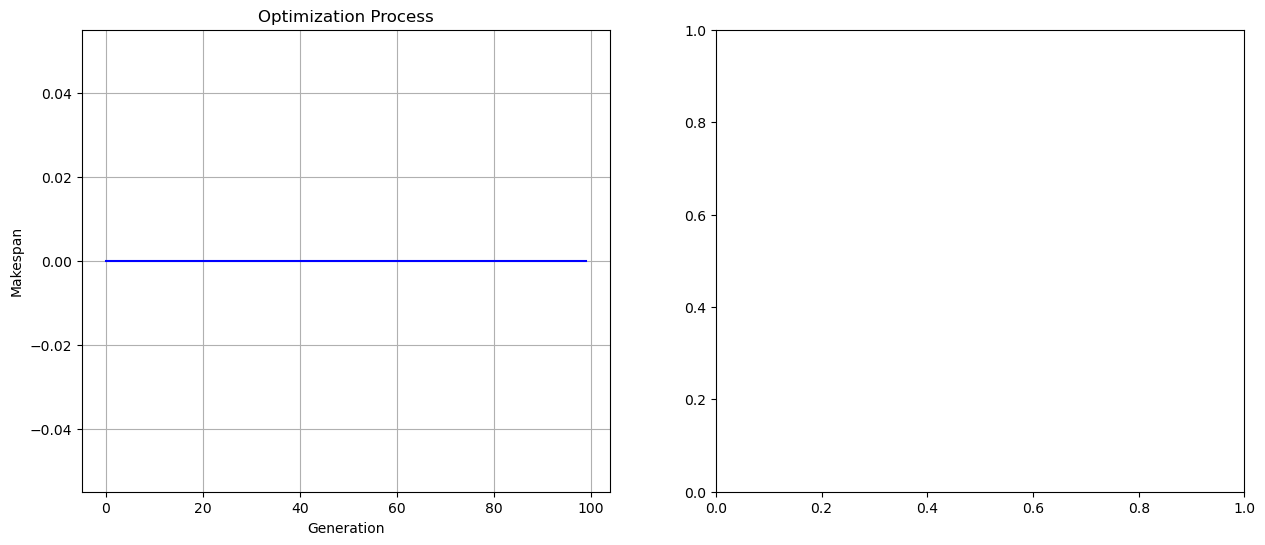

In [6]:
# AGV参数
AGV_COUNT = 2
TRANSPORT_TIME = {
    ('L/U', 'M1'): 3, ('L/U', 'M2'): 3, ('L/U', 'M3'): 3, ('L/U', 'M4'): 3,
    ('M1', 'M2'): 2, ('M1', 'M3'): 3, ('M1', 'M4'): 4,
    ('M2', 'M3'): 2, ('M2', 'M4'): 3,
    ('M3', 'M4'): 2
}
for (a,b), t in list(TRANSPORT_TIME.items()):
    TRANSPORT_TIME[(b,a)] = t

# 预处理生成工序链
jobs = []
for job_id in range(len(time_matrix)):
    steps = []
    for step in range(len(time_matrix[job_id])):
        if time_matrix[job_id][step] == -1:
            break
        machine = machine_matrix[job_id][step] - 1
        steps.append({
            'machine': machine,
            'duration': time_matrix[job_id][step],
            'transport': []
        })
    jobs.append(steps)

# 添加运输任务
for job_id, job in enumerate(jobs):
    prev_loc = 'L/U'
    for step_idx, step in enumerate(job):
        machine = f'M{step["machine"]+1}'
        
        # 前运输
        step['transport'].append({
            'type': 'pickup',
            'from': prev_loc,
            'to': machine,
            'time': TRANSPORT_TIME[(prev_loc, machine)]
        })
        
        # 后运输
        if step_idx == len(job)-1:
            step['transport'].append({
                'type': 'return',
                'from': machine,
                'to': 'L/U',
                'time': TRANSPORT_TIME[(machine, 'L/U')]
            })
        else:
            next_machine = f'M{jobs[job_id][step_idx+1]["machine"]+1}'
            step['transport'].append({
                'type': 'transfer',
                'from': machine,
                'to': next_machine,
                'time': TRANSPORT_TIME[(machine, next_machine)]
            })
        prev_loc = machine

# 遗传算法参数
POP_SIZE = 50
MAX_GEN = 100
CX_PROB = 0.8
MUT_PROB = 0.2
ELITE_SIZE = 2

class ScheduleGene:
    def __init__(self, job_id, step_id, agv_assign):
        self.job_id = job_id
        self.step_id = step_id
        self.agv_assign = agv_assign  # [前运输AGV, 后运输AGV]

# [保持之前的输入数据、预处理、参数定义不变]

class Chromosome:
    def __init__(self, genes):
        self.genes = genes
        self._makespan = None
    
    def decode(self):
        machine_schedule = defaultdict(list)
        agv_schedule = defaultdict(list)
        job_progress = defaultdict(float)
        agv_times = [0.0] * AGV_COUNT
        
        for gene in self.genes:
            job_id = gene.job_id
            step_id = gene.step_id
            step = jobs[job_id][step_id]
            
            # 前运输
            agv_pre = gene.agv_assign[0]
            pre_trans = step['transport'][0]
            transport_start_pre = max(
                job_progress.get((job_id, step_id-1), 0.0),
                agv_times[agv_pre]
            )
            transport_end_pre = transport_start_pre + pre_trans['time']
            agv_schedule[agv_pre].append({
                'start': transport_start_pre,
                'end': transport_end_pre,
                'from': pre_trans['from'],
                'to': pre_trans['to']
            })
            agv_times[agv_pre] = transport_end_pre
            
            # 加工
            machine = f'M{step["machine"]+1}'
            process_start = transport_end_pre
            process_end = process_start + step['duration']
            machine_schedule[machine].append({
                'start': process_start,
                'end': process_end
            })
            
            # 后运输
            agv_post = gene.agv_assign[1]
            post_trans = step['transport'][1]
            transport_start_post = max(process_end, agv_times[agv_post])
            transport_end_post = transport_start_post + post_trans['time']
            agv_schedule[agv_post].append({
                'start': transport_start_post,
                'end': transport_end_post,
                'from': post_trans['from'],
                'to': post_trans['to']
            })
            agv_times[agv_post] = transport_end_post
            
            # 记录作业进度
            job_progress[(job_id, step_id)] = transport_end_post
        
        # 计算总完成时间
        all_ends = []
        for m in machine_schedule.values():
            all_ends.extend([t['end'] for t in m])
        for a in agv_schedule.values():
            all_ends.extend([t['end'] for t in a])
        self._makespan = max(all_ends) if all_ends else 0
        return self._makespan
    
    def makespan(self):
        if self._makespan is None:
            self.decode()
        return self._makespan

# [其余函数保持不变]

def initialize_population():
    population = []
    for _ in range(POP_SIZE):
        genes = []
        job_progress = defaultdict(int)
        while sum(len(job) - p for job, p in job_progress.items()) > 0:
            available = [j for j in range(len(jobs)) if job_progress[j] < len(jobs[j])]
            job = random.choice(available)
            step = job_progress[job]
            agv_assign = [random.randint(0, AGV_COUNT-1), random.randint(0, AGV_COUNT-1)]
            genes.append(ScheduleGene(job, step, agv_assign))
            job_progress[job] += 1
        population.append(Chromosome(genes))
    return population

def crossover(p1, p2):
    child_genes = []
    job_progress = defaultdict(int)
    ptr1, ptr2 = 0, 0
    
    while len(child_genes) < len(p1.genes):
        if random.random() < 0.5:
            while ptr1 < len(p1.genes):
                gene = p1.genes[ptr1]
                if job_progress[gene.job_id] == gene.step_id:
                    child_genes.append(gene)
                    job_progress[gene.job_id] += 1
                    ptr1 += 1
                    break
                ptr1 += 1
        else:
            while ptr2 < len(p2.genes):
                gene = p2.genes[ptr2]
                if job_progress[gene.job_id] == gene.step_id:
                    child_genes.append(gene)
                    job_progress[gene.job_id] += 1
                    ptr2 += 1
                    break
                ptr2 += 1
    return Chromosome(child_genes)

def mutation(chrom):
    new_genes = deepcopy(chrom.genes)
    
    # 交换工序
    if random.random() < MUT_PROB and len(new_genes) >= 2:
        i, j = random.sample(range(len(new_genes)), 2)
        new_genes[i], new_genes[j] = new_genes[j], new_genes[i]
    
    # 修改AGV分配
    for gene in new_genes:
        if random.random() < 0.1:
            gene.agv_assign = [random.randint(0, AGV_COUNT-1), random.randint(0, AGV_COUNT-1)]
    
    return Chromosome(new_genes)

def genetic_algorithm():
    population = initialize_population()
    best = min(population, key=lambda x: x.makespan())
    history = []
    
    for gen in range(MAX_GEN):
        # 评估
        population.sort(key=lambda x: x.makespan())
        current_best = population[0].makespan()
        history.append(current_best)
        
        # 更新最优
        if current_best < best.makespan():
            best = deepcopy(population[0])
        
        # 生成新一代
        elites = population[:ELITE_SIZE]
        offspring = []
        while len(offspring) < POP_SIZE - ELITE_SIZE:
            parents = random.sample(population[:POP_SIZE//2], 2)
            if random.random() < CX_PROB:
                child = crossover(parents[0], parents[1])
            else:
                child = deepcopy(random.choice(parents))
            child = mutation(child)
            offspring.append(child)
        
        population = elites + offspring
        print(f"Gen {gen+1}: Best={current_best}")
    
    return best, history

def plot_gantt(chrom, history):
    plt.figure(figsize=(15, 6))
    
    # 迭代过程
    plt.subplot(1, 2, 1)
    plt.plot(history, 'b-')
    plt.title("Optimization Process")
    plt.xlabel("Generation")
    plt.ylabel("Makespan")
    plt.grid(True)
    
    # 甘特图
    plt.subplot(1, 2, 2)
    schedule = chrom._schedule
    colors = plt.cm.tab20.colors
    y_ticks = []
    y_labels = []
    
    # 绘制机器
    for idx, (machine, tasks) in enumerate(sorted(schedule['machines'].items())):
        y = idx * 3
        for task in tasks:
            plt.barh(y=y, 
                    width=task['end']-task['start'],
                    left=task['start'],
                    height=2,
                    color=colors[task['job'] % 20],
                    edgecolor='black')
            plt.text((task['start']+task['end'])/2, y,
                    f"J{task['job']+1}-S{task['step']+1}",
                    ha='center', va='center')
        y_ticks.append(y)
        y_labels.append(machine)
    
    # 绘制AGV
    for idx, (agv, tasks) in enumerate(schedule['agvs'].items()):
        y = len(schedule['machines'])*3 + idx*3
        for task in tasks:
            plt.barh(y=y,
                    width=task['end']-task['start'],
                    left=task['start'],
                    height=2,
                    color=colors[task['job'] % 20],
                    edgecolor='black',
                    alpha=0.5)
            plt.text((task['start']+task['end'])/2, y,
                    f"{task['from']}→{task['to']}",
                    ha='center', va='center')
        y_ticks.append(y)
        y_labels.append(f'AGV{agv+1}')
    
    plt.yticks(y_ticks, y_labels)
    plt.xlabel('Time (minutes)')
    plt.title('Scheduling Gantt Chart')
    plt.grid(axis='x')
    
    # 图例
    patches = [mpatches.Patch(color=colors[i%20], label=f'Job {i+1}') 
               for i in range(len(jobs))]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

# 运行算法
best_solution, history = genetic_algorithm()
print(f"最优完成时间: {best_solution.makespan()} 分钟")
plot_gantt(best_solution, history)